# SOCIAL MEDIA ADDICTION ANALYSIS AMONG UNIVERSITY STUDENTS

## Business Problem

**How can universities detect and reduce the negative academic impact of social media addiction among students using behavioral and usage data?**

University students are increasingly spending more time on social media platforms, often to the detriment of their academic performance, mental health, and sleep quality. This analysis aims to identify patterns of excessive usage, understand their correlation with academic outcomes, and create predictive tools to help institutions intervene early.

## Business Objective

To assist universities and student welfare departments in:
- Identifying students at risk of severe social media addiction.
- Understanding the behavioral predictors most correlated with academic and personal decline.
- Designing proactive intervention strategies that improve academic success and student well-being.

## Stakeholders

- University Administrators  
- Student Wellness and Counseling Departments  
- Academic Policy Makers  
- Educational Technology Startups  

## Analytics Objectives

1. **Classification Task**  
   Predict whether a student is at risk of social media addiction and its severity.

2. **Regression or Classification Task**  
   Predict the level of academic impact based on social media usage patterns.

3. **Clustering Task**  
   Segment students into behavioral groups for personalized outreach or interventions.

4. **Exploratory Data Analysis (EDA)**  
   - Discover the most influential features (e.g time spent, platform type) associated with negative outcomes.
   - Visualize usage trends across demographics (gender, age).

## Potential Applications

- Early warning systems for academic counselors.
- Integration with learning platforms to flag at-risk behavior.
- Dashboards for student self-assessment and digital wellness tracking.


## INITIAL DATA EXPLORATION (IDE)

Every dataset tells a story- but before I dive into any narratives, I'll flip through the table of contents. This phase is about getting comfortable with the data: seeing what’s there, what’s missing, and what might surprise me later if I don’t pay attention now.

#### What's happening:
- Importing key libraries like 'pandas', 'numpy', 'seaborn', 'matplotlib', and 'plotly'- the usual suspects for slicing, dicing and visualizing data.
- Previewing the first few rows to get a feel for the dataset’s structure, naming conventions, and early red flags (no one likes nasty surprises 30 cells in).
- Checking the shape of the data because whether it's 500 rows or 50,000 completely changes the game.
- Get metadata
- Get basic statistics information of both numerica and categorical columns

This might not be the flashiest part of the workflow, but it’s where trust is built- between me and the dataset. And as I’ve learned from previous projects, a few extra minutes spent here can save hours of confusion down the road.

Exploration done right is part instinct, part structure- this is BOTH!

In [44]:
# Mathematical computation and data manipulation libraries
import numpy as np
import pandas as pd

# Data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go

# Load the data
student_df = pd.read_csv('Students Social Media Addiction.csv')

# Preview first 5
student_df.head()

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7


In [45]:
# Check how many rows and columns I am working with
print(f'The dataset has {student_df.shape[0]} rows and {student_df.shape[1]} columns')

# Check column names to inform on standardisation needs
print('\nColumn Names:\n', student_df.columns)

The dataset has 705 rows and 13 columns

Column Names:
 Index(['Student_ID', 'Age', 'Gender', 'Academic_Level', 'Country',
       'Avg_Daily_Usage_Hours', 'Most_Used_Platform',
       'Affects_Academic_Performance', 'Sleep_Hours_Per_Night',
       'Mental_Health_Score', 'Relationship_Status',
       'Conflicts_Over_Social_Media', 'Addicted_Score'],
      dtype='object')


In [46]:
# Standardise column names
student_df.columns = (student_df.columns.str.strip().str.lower())

# Preview changes
student_df.sample(4)

,student_id,age,gender,academic_level,country,avg_daily_usage_hours,most_used_platform,affects_academic_performance,sleep_hours_per_night,mental_health_score,relationship_status,conflicts_over_social_media,addicted_score
386,387,20,Female,Undergraduate,USA,7.4,TikTok,Yes,4.9,5,In Relationship,4,9
96,97,18,Male,High School,Kuwait,5.7,Snapchat,Yes,5.3,5,In Relationship,4,8
287,288,22,Male,Graduate,Germany,3.5,Facebook,No,8.0,8,In Relationship,1,4
102,103,20,Male,Undergraduate,Yemen,4.7,Facebook,Yes,5.8,6,In Relationship,3,7


In [47]:
# Get metadata
student_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   student_id                    705 non-null    int64  
 1   age                           705 non-null    int64  
 2   gender                        705 non-null    object 
 3   academic_level                705 non-null    object 
 4   country                       705 non-null    object 
 5   avg_daily_usage_hours         705 non-null    float64
 6   most_used_platform            705 non-null    object 
 7   affects_academic_performance  705 non-null    object 
 8   sleep_hours_per_night         705 non-null    float64
 9   mental_health_score           705 non-null    int64  
 10  relationship_status           705 non-null    object 
 11  conflicts_over_social_media   705 non-null    int64  
 12  addicted_score                705 non-null    int64  
dtypes: fl

In [48]:
# Get basic statistical info of numerical variables
student_df.describe()

,student_id,age,avg_daily_usage_hours,sleep_hours_per_night,mental_health_score,conflicts_over_social_media,addicted_score
count,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000
mean,353.000000,20.659574,4.918723,6.868936,6.226950,2.849645,6.436879
std,203.660256,1.399217,1.257395,1.126848,1.105055,0.957968,1.587165
min,1.000000,18.000000,1.500000,3.800000,4.000000,0.000000,2.000000
25%,177.000000,19.000000,4.100000,6.000000,5.000000,2.000000,5.000000
50%,353.000000,21.000000,4.800000,6.900000,6.000000,3.000000,7.000000
75%,529.000000,22.000000,5.800000,7.700000,7.000000,4.000000,8.000000
max,705.000000,24.000000,8.500000,9.600000,9.000000,5.000000,9.000000


In [49]:
# Get basic statistical info of categorical variables
student_df.describe(include = 'O').T

,count,unique,top,freq
gender,705,2,Female,353
academic_level,705,3,Undergraduate,353
country,705,110,India,53
most_used_platform,705,12,Instagram,249
affects_academic_performance,705,2,Yes,453
relationship_status,705,3,Single,384


In [50]:
# Check for duplicattes and nulls
print('Duplicates:', student_df.duplicated().sum())
print('\nNull Values:\n', student_df.isna().sum())

Duplicates: 0

Null Values:
 student_id                      0
age                             0
gender                          0
academic_level                  0
country                         0
avg_daily_usage_hours           0
most_used_platform              0
affects_academic_performance    0
sleep_hours_per_night           0
mental_health_score             0
relationship_status             0
conflicts_over_social_media     0
addicted_score                  0
dtype: int64


# DATA UNDERSTANDING

Before diving deep into analysis, it's crucial to understand the landscape of the dataset- its structure, health, and what the raw numbers are whispering beneath the surface.

### Dataset Snapshot

The dataset comprises **705 student records**, each detailing social media habits, academic status, and mental health indicators. The data is clean and structured- no null values, no duplicate records. A solid foundation to build insights on.

### Data Integrity

**Duplicates:** 0- Each entry is unique.

**Null Values:** None- All fields are complete.

This means no immediate data wrangling is needed- we can proceed straight to meaningful exploration.

### Categorical Features

| Feature | Unique Values | Most Frequent | Frequency |
|---------|----------------|----------------|-----------|
| 'gender' | 2 | Female | 353 |
| 'academic_level' | 3 | Undergraduate | 353 |
| 'country' | 110 | India | 53 |
| 'most_used_platform' | 12 | Instagram | 249 |
| 'affects_academic_performance' | 2 | Yes | 453 |
| 'relationship_status' | 3 | Single | 384 |

**Observation:**  
- The dataset skews slightly towards **female students** and **undergraduates**.  
- **Instagram** dominates as the most-used platform, hinting at a potential hotspot for behavioral patterns.  
- A majority acknowledge that social media affects their academic performance.

### Numerical Features (Summary Statistics)

| Feature | Mean | Std | Min | 25% | 50% | 75% | Max |
|---------|------|-----|-----|-----|-----|-----|-----|
| 'age' | 20.66 | 1.40 | 18 | 19 | 21 | 22 | 24 |
| 'avg_daily_usage_hours' | 4.92 | 1.26 | 1.5 | 4.1 | 4.8 | 5.8 | 8.5 |
| 'sleep_hours_per_night' | 6.87 | 1.13 | 3.8 | 6.0 | 6.9 | 7.7 | 9.6 |
| 'mental_health_score' | 6.23 | 1.11 | 4 | 5 | 6 | 7 | 9 |
| 'conflicts_over_social_media' | 2.85 | 0.96 | 0 | 2 | 3 | 4 | 5 |
| 'addicted_score' | 6.44 | 1.59 | 2 | 5 | 7 | 8 | 9 |

**Observation Highlights:**
- On average, students spend just under **5 hours daily** on social media- nearly a part-time job.
- Most students report getting **~7 hours of sleep**, but there's a low-end outlier at 3.8 hours.
- **Mental health scores** lean toward moderate to good (mean ≈ 6.2 out of 10), but deeper analysis may reveal platform or usage correlations.
- **Addiction scores** show notable variation- an area worth visualizing across academic levels or usage time.

### Early Insight Teasers

- Heavy Instagram usage and high average screen time could signal burnout or academic pressure.
- Students reporting more social media conflicts tend to rate higher on the addiction scale.
- Relationship status might have an influence on both usage and mental health metrics. Are lonely hearts coping with memes or melting- a juicy angle for later  

Next step? Let’s dive into **exploratory data analysis** and uncover the patterns hiding in plain sight.

Grab your matcha, your mouse, and your mental map- this rabbit hole’s about to get interesting.

# EXPLORATORY DATA ANALYSIS (EDA)

Time to lift the hood.

EDA is where the dataset stops being "just numbers" and starts telling *its story*. Patterns start peeking through. Outliers try to hide. Trends? They whisper- if you’re paying attention.

We're not just plotting for aesthetics- we’re here to ask:
- Who’s using what?
- How deep is the scroll?
- Is Instagram just a time-killer, or a mental health landmine?
- Do students sleeping less also feel worse?
- And does being single = more screen time?

This is the stage where the **"what"** meets the **"why."**  


But first...


## Feature Engineering

The average age floats around 20.6, but raw age alone doesn’t always tell us much- especially when we're looking for *group-level behavior*. 

So, we'll slice age into meaningful buckets (age-group):

- **18–19**: Freshmen & early college energy.
- **20–21**: Mid-academia hustle- balancing dreams, deadlines, and DMs.
- **22–24**: Final stretch- prepping for life after school (or just more school).

This makes it easier to compare behavior across stages- think: Does social media hit different when you're just starting uni vs. when you’re about to finish?

Let's create that new feature: 'age_group'.

In [51]:
# Define function to bucket age
def age_group(age):
    if 16 <= age <= 19:
        return '16-19'
    elif 20 <= age <= 22:
        return '20-22'
    elif 23 <= age <= 25:
        return '23-25'
    else:
        return 'Other'

# Apply function to create new column
student_df['age_group'] = student_df['age'].apply(age_group)

# Preview changes
student_df['age_group'].value_counts()

20-22    468
16-19    177
23-25     60
Name: age_group, dtype: int64

## Outlier Detection: 

Before we start trusting averages and plotting trends, we gotta check:  
Which values are legit... and which are just statistical noise?

We’ll focus on the **numerical columns**:

- 'age'  
- 'avg_daily_usage_hours'  
- 'sleep_hours_per_night'  
- 'mental_health_score'  
- 'conflicts_over_social_media'  
- 'addicted_score'

We’ll use **IQR (Interquartile Range) method** — a solid way to catch outliers without assuming normality. Here's how it goes:

- Anything below **Q1 - 1.5 × IQR** or above **Q3 + 1.5 × IQR** gets flagged.
- But context matters — not every "outlier" is bad. Some are just real people with chaotic routines.

We’ll plot them too- boxplotsto *see* where the edge cases lie.

Because sometimes, the outliers aren’t errors- they’re the story.

In [52]:
# List of numerical columns to check
num_cols = [
    'age',
    'avg_daily_usage_hours',
    'sleep_hours_per_night',
    'mental_health_score',
    'conflicts_over_social_media',
    'addicted_score'
]

# Create a DataFrame to flag outliers
outlier_summary = {}

for col in num_cols:
    Q1 = student_df[col].quantile(0.25)
    Q3 = student_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = student_df[(student_df[col] < lower_bound) | (student_df[col] > upper_bound)]
    
    outlier_summary[col] = {
        'count': len(outliers),
        'percent': round((len(outliers) / len(student_df)) * 100, 2),
        'lower_bound': lower_bound,
        'upper_bound': upper_bound
    }

# Convert summary to a DataFrame
outlier_df = pd.DataFrame(outlier_summary).T
outlier_df


,count,percent,lower_bound,upper_bound
age,0.0,0.00,14.50,26.50
avg_daily_usage_hours,3.0,0.43,1.55,8.35
sleep_hours_per_night,0.0,0.00,3.45,10.25
mental_health_score,0.0,0.00,2.00,10.00
conflicts_over_social_media,0.0,0.00,-1.00,7.00
addicted_score,0.0,0.00,0.50,12.50


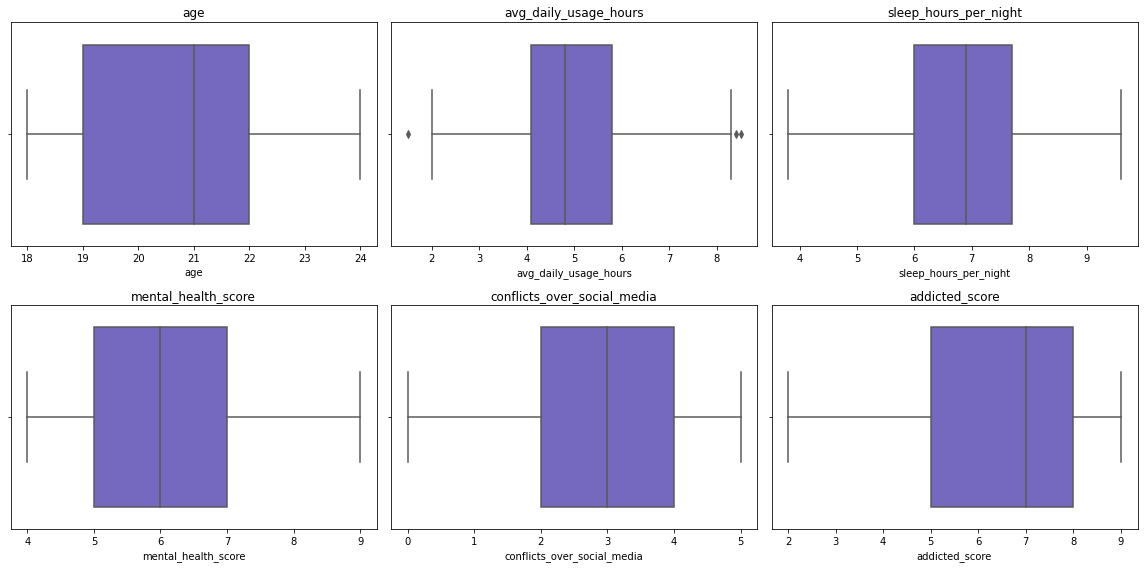

In [53]:
# Visualise outliers
plt.figure(figsize = (16, 8))

for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x = student_df[col], color = '#6a5acd')
    plt.title(f'{col}')
    plt.tight_layout()

**Key Takeaway:**  
Only **'avg_daily_usage_hours'** shows a slight presence of outliers- just 3 students (0.43%) who are likely heavy social media users (probably TikTok warriors or meme page admins). The rest of the numerical fields are **clean and within range**, so we can proceed without needing to cap or remove any values.

We’ll keep those 3 usage-hour outliers in for now — they’re *real behavior*, not data errors.

# UNIVARIATE ANALYSIS

Before we start connecting dots and drawing conclusions, we need to understand each feature on its own- no distractions, no correlations, just the raw behavior of the variables.

This phase is about asking:  
- What’s the shape of our data?
- Are values clustered, skewed, or flatlined?
- Who’s dominating the scene in each category?

We’ll break it down:
- **Categorical variables**- using bar plots to spot the loudest voices.
- **Numerical variables**- histograms and distributions.

This isn’t just a stats check- it’s the part where we get familiar with the cast before analyzing the plot.

Let’s meet the features.

## 1. Age Group

Age is more than just a number- it’s a behavioral compass. In this context, it helps us decode maturity levels, digital tendencies, and academic resilience. Whether it’s a 19-year-old riding the algorithm wave on TikTok or a 24-year-old balancing coursework with real-world responsibilities, age gives us context that raw numbers can’t.

In this analysis, we’ve grouped students into distinct **age bands** to make patterns easier to spot- because let’s face it, analyzing a swarm of floating integers isn’t anyone’s idea of clarity. These bins aren’t arbitrary; they reflect real transitions in lifestyle, motivation, and digital consumption.

So before we start connecting dots between screen time and sleep cycles, let’s answer a simple question:  
**Who’s actually in this data?**

In [54]:
# Get and display the value counts for age groups
age_group_summary = (
    student_df['age_group']
    .value_counts()
    .reset_index()
    .rename(columns={'index': 'age_group', 'age_group': 'count'})
    .sort_values('age_group')
)

# Display summary before plotting
print('Age Group Counts:')
print(age_group_summary)

# Create bar plot
fig = px.bar(
    age_group_summary, 
    x = 'age_group', 
    y = 'count',
    color = 'age_group',
    title = 'Distribution of Age Groups',
    text = 'count',
    color_discrete_sequence = ['#4B0082', '#6A5ACD', '#8A2BE2']
)

fig.update_layout(
    font = dict(
        family = 'Lato',
        size = 14,
        color = 'black'
    ),

    xaxis_title = 'Age Group',
    yaxis_title = 'Number of Students',
    showlegend = False
)

fig.show()

Age Group Counts:
  age_group  count
1     16-19    177
0     20-22    468
2     23-25     60


>- **20–22 years** dominates the cohort, representing **~66%** of the sample (468 students).
>- **16–19 years** follow at **~25%** (177 students).
>- Only **~9%** (60 students) fall within the **23–25 years** bracket.

>**Observation:** This age distribution suggests that the majority of respondents are likely in the **early stages of undergraduate studies**, a critical developmental window where digital behavior and academic performance are often most sensitive to environmental and psychological factors.

>The **underrepresentation of older students (23–25)** may either reflect the typical age distribution of the academic institution or indicate reduced survey engagement from upperclassmen or non-traditional students.

## 2. Gender
Before diving into behavior patterns, it's important to know who’s at the table- in this case, we’re looking at gender distribution.

Why does gender matter here? Because digital behavior isn't one-size-fits-all. From platform preferences to average screen time, gender can subtly- or not so subtly- influence how students engage with technology, how they cope, and how they learn.

In this dataset, gender is reported as **Male** or **Female**, and while it might seem like a basic demographic checkbox, it often turns out to be one of the most telling factors in understanding mental health patterns, academic pressures, and even social media conflicts.

So, let’s break it down: what’s the gender balance among our students? And more importantly, what might that mean for how we interpret their digital lives?

In [55]:
# Get and display the value counts for gender
gender_summary = (
    student_df['gender']
    .value_counts()
    .reset_index()
    .rename(columns={'index': 'gender', 'gender': 'count'})
    .sort_values('gender')
)

# Display summary before plotting
print('Gender Counts:')
print(gender_summary)

# Create bar plot
fig = px.bar(
    gender_summary, 
    x = 'gender', 
    y = 'count',
    color = 'gender',
    title = 'Distribution of Gender',
    text = 'count',
    color_discrete_sequence = ['#FFA07A', '#6A5ACD']
)

fig.update_layout(
    font = dict(
        family = 'Lato',
        size = 14,
        color = 'black'
    ),
    
    xaxis_title = 'Gender',
    yaxis_title = 'Number of Students',
    showlegend = False
)

fig.show()

Gender Counts:
   gender  count
0  Female    353
1    Male    352


> The gender breakdown of the 705 students in the dataset is nearly perfectly balanced:

> - **Female students**: 353 (**50.1%**)
> - **Male students**: 352 (**49.9%**)

>**Observation:** This remarkably even split offers a **valuable foundation for unbiased comparative analysis** across gender. Whether examining academic performance, social media usage, or mental health indicators, this balance ensures that observed differences are less likely to be the result of sample imbalance and more reflective of genuine behavioral or experiential variation.

>**Implication:** Analyses stratified by gender (e.g addiction score, conflict frequency, or academic impact) can be conducted with strong statistical integrity and minimal need for sample weighting.


## 3. Academic Level
Let’s talk credentials- not ours, but the academic level of the students in this dataset.

Understanding whether a student is in high school, undergrad, or grad school isn’t just semantics- it frames everything from stress levels to social media behavior. A high schooler procrastinating on TikTok is very different from a grad student "doom-researching" on LinkedIn.

Academic level also gives us insight into maturity, digital responsibility, and possibly how close someone is to deleting Instagram and becoming a full-time Notion user.

Let’s see which educational stages dominate this dataset.

In [56]:
# Define the correct academic level order (ascending)
level_order = ['High School', 'Graduate', 'Undergraduate']

# Get and display the value counts for academic level
academic_lvl_summary = (
    student_df['academic_level']
    .value_counts()
    .reset_index()
    .rename(columns = {'index': 'academic_level', 'academic_level': 'count'})
)

# Apply the custom category order
academic_lvl_summary['academic_level'] = pd.Categorical(
    academic_lvl_summary['academic_level'],
    categories = level_order,
    ordered = True
)

# Sort by the ordered category
academic_lvl_summary = academic_lvl_summary.sort_values('academic_level')

# Display summary before plotting
print('Academic Level Counts:')
print(academic_lvl_summary)

# Create bar plot with a progressive color palette (e.g. Viridis)
fig = px.bar(
    academic_lvl_summary, 
    x = 'academic_level', 
    y = 'count',
    color = 'academic_level',
    title = 'Distribution of Academic Levels',
    text = 'count',
    color_discrete_sequence = ['#A8D5BA', '#56B4D3', '#482878']
)

# Update layout
fig.update_layout(
    font = dict(family = 'Lato', size = 14, color = 'black'),
    xaxis_title = 'Academic Level',
    yaxis_title = 'Number of Students',
    showlegend = False
)

fig.show()

Academic Level Counts:
  academic_level  count
2    High School     27
1       Graduate    325
0  Undergraduate    353


>The student population in this dataset is composed of three academic levels:

> - **Undergraduates**: 353 students (**50.1%**)
> - **Graduates**: 325 students (**46.1%**)
> - **High School students**: 27 students (**3.8%**)

> **Observation:** This distribution shows a **heavy concentration in higher education**, with **undergraduates and graduates comprising over 96%** of the dataset. The small number of high school students suggests limited representation of pre-university learners, which may affect the generalizability of certain findings to younger age groups.

> **Implication:** Analytical focus should primarily target behaviors and patterns among **university-level students**, as their dominant presence drives most of the insights. However, high school responses, while limited, can still provide early signals worth exploring in targeted comparisons.

## 4. Country
Where are these students actually from?

The dataset spans dozens of countries- which means behavior is shaped not just by age and academic stress, but by **culture, connectivity, and even platform popularity**. TikTok might reign in one country while Facebook refuses to die in another.

Understanding the **top contributing countries** helps frame digital behavior through a global lens- because context is everything, and the internet may be universal, but how we use it? Not even close.

Let’s map this out.

In [57]:
# Get and display the top 20 countries by student count
country_counts = (
    student_df['country']
    .value_counts()
    .reset_index()
    .rename(columns = {'index': 'country', 'country': 'count'})
    .head(20)
)

print("Top 20 Countries by Student Count:")
print(country_counts)

# Create enhanced treemap
fig = px.treemap(
    country_counts,
    path = ['country'],
    values = 'count',
    title = 'Country Distribution – Top 20',
    color = 'count',
    color_continuous_scale = 'Aggrnyl',
)

# Styling
fig.update_layout(
    font = dict(family = 'Lato', size = 14, color = 'black'),
    margin = dict(t = 60, l = 20, r = 20, b = 20),
    paper_bgcolor = 'white',
    plot_bgcolor = 'white'
)

# Formatting
fig.data[0].texttemplate = "%{label}<br>👥 %{value} students"

fig.show()

Top 20 Countries by Student Count:
        country  count
0         India     53
1           USA     40
2        Canada     34
3        Mexico     27
4       Ireland     27
5        Turkey     27
6        France     27
7       Denmark     27
8   Switzerland     27
9         Spain     27
10           UK     22
11        Italy     21
12       Russia     21
13        Japan     21
14   Bangladesh     20
15        Nepal     19
16     Pakistan     19
17     Maldives     19
18    Sri Lanka     19
19       Poland     16


> The dataset features students from **over 100 countries**, reflecting a rich global diversity. Here are the top 20 countries by student count:
> - **India leads** with 53 students, followed by:
> - **USA** (40), **Canada** (34), and a cluster of countries (e.g Mexico, France, Switzerland, Denmark, Turkey, Spain, and Ireland) all with **~27 students** each.
> - Several other countries (e.g., UK, Italy, Japan, Russia) show moderate representation between 20–22 students.

> **Observation:** This long-tailed distribution suggests a dataset that, while diverse, is somewhat skewed toward a few countries with higher student engagement or availability. Cultural context, academic pressure, digital infrastructure, and platform accessibility may differ significantly across these regions — something to keep in mind when interpreting cross-country behaviors.

>**Implication:** Cross-national comparisons (e.g platform preference, addiction scores, mental health trends) should account for uneven sample sizes. For robust comparative insights, focus on countries with ≥20 participants to ensure statistical relevance.

## 5. Average daily social media usage in hours
Here’s the million-scroll question: **How many hours a day are students glued to social media?**

Spoiler alert: it’s… a lot.

This variable tells us how deep we are into the attention economy- whether we’re looking at casual scrollers, committed content zombies, or folks who need a Screen Time intervention. It’s the behavioral backbone of this dataset and a potential predictor of everything from sleep disruption to academic slippage.

Let’s break down how long students are actually staying online- and who might be one notification away from burnout.

In [58]:
# Define bins and labels
bins = [0, 2, 4, 6, 8, 10]
labels = ['0–2 hrs', '2–4 hrs', '4–6 hrs', '6–8 hrs', '8–10 hrs']

# Bin the usage hours
student_df['usage_bin'] = pd.cut(student_df['avg_daily_usage_hours'], bins = bins, labels = labels, right = False)

# Get value counts of binned usage
usage_counts_binned = student_df['usage_bin'].value_counts().sort_index()

# Print the binned value counts
print("Average Daily Usage:")
print(usage_counts_binned)

# Plot figure
fig = px.histogram(
    student_df,
    x = 'avg_daily_usage_hours',
    nbins = 30,
    title = 'Distribution of Average Daily Social Media Usage',
    color_discrete_sequence = ['#6A5ACD']
)

fig.update_layout(
    xaxis_title = 'Avg Daily Usage (Hours)',
    yaxis_title = 'Number of Students',
    font = dict(family = 'Lato, sans-serif')
)

fig.show()

Average Daily Usage:
0–2 hrs       1
2–4 hrs     153
4–6 hrs     401
6–8 hrs     144
8–10 hrs      6
Name: usage_bin, dtype: int64


> Binning average daily usage hours reveals a **heavily concentrated pattern of engagement** among students:
> - **4–6 hours/day**: 401 students (**~57%**)  
> - **2–4 hours/day**: 153 students (**~22%**)  
> - **6–8 hours/day**: 144 students (**~20%**)  
> - Outliers include:
    - **8–10 hours/day**: 6 students
    - **0–2 hours/day**: just 1 student

> **Observation:** This distribution shows that **over 77% of students spend 4–8 hours daily** on social media — a level of engagement that borders on habitual and potentially impacts academic and cognitive performance. Minimal representation at the extremes (especially the <2 hr group) suggests that **low social media exposure is rare** among the cohort.

>**Implication:** Any analyses relating to addiction, academic disruption, or mental health should treat the 4–8 hour band as the behavioral norm — and deviations from it as potentially meaningful outliers.

## 6. Most used platform
Everyone has their digital poison- and this variable tells us what the students are sipping on.

From Instagram reels to TikTok spirals, platform preference isn’t just about trends- it’s a **behavioral fingerprint**. It shows what kind of content students consume, how they engage, and possibly what keeps them up at 2am when they swore they’d just check one notification.

So which apps reign supreme among this cohort?

In [59]:
# Get and display the value counts
platform_counts = (
    student_df['most_used_platform']
    .value_counts()
    .reset_index()
    .rename(columns = {'index': 'Platform', 'most_used_platform': 'Count'})
)

print("Most Used Platforms:")
print(platform_counts)

# Define brand colors
platform_colors = {
    'Instagram': '#E1306C',
    'WhatsApp': '#25D366',
    'Facebook': '#1877F2',
    'Twitter': '#000000',
    'TikTok': '#010101',
    'Snapchat': '#FFFC00',
    'Telegram': '#0088CC',
    'YouTube': '#FF0000',
    'Discord': '#7289DA',
    'LinkedIn': '#0077B5'
}

# Plot figure
fig = px.bar(
    platform_counts.sort_values('Count'),
    x = 'Count',
    y = 'Platform',
    orientation = 'h',
    text = 'Count',
    color = 'Platform',
    color_discrete_map = platform_colors,
    title = 'Most Used Social Media Platforms (Branded)'
)

# Styling
fig.update_layout(
    font = dict(family = 'Lato', size = 14),
    xaxis_title = 'Number of Students',
    yaxis_title = 'Platform',
    showlegend = False
)

fig.show()

Most Used Platforms:
     Platform  Count
0   Instagram    249
1      TikTok    154
2    Facebook    123
3    WhatsApp     54
4     Twitter     30
5    LinkedIn     21
6      WeChat     15
7    Snapchat     13
8   KakaoTalk     12
9   VKontakte     12
10       LINE     12
11    YouTube     10


> The data reveals a **clear dominance of visually-driven and mobile-first platforms** among students:
>- **Instagram** tops the list with **249 users (~35%)**
>- Followed by **TikTok** (154) and **Facebook** (123), completing the top 3
>- Messaging apps like **WhatsApp** (54) and **Twitter** (30) follow, but at a much lower scale
>- Niche platforms such as **LinkedIn, WeChat, Snapchat, VKontakte, LINE, KakaoTalk, and YouTube** round out the list, each with under 25 users

>**Obseervation:** This platform preference landscape reflects a **youth-centric digital culture**, where image-based interaction and algorithm-curated content dominate attention spans. Notably, **professional or productivity-oriented platforms (e.g., LinkedIn, YouTube)** are underrepresented, suggesting that **social use far outweighs academic or career utility** in student media consumption.

>**Implication:** When evaluating metrics like addiction scores or academic impact, platforms like **Instagram and TikTok** should be closely examined as potential behavioral drivers. Their design mechanics (e.g infinite scroll, short-form video, algorithmic dopamine loops) may contribute more significantly to attention fragmentation and compulsive use.


## 7. Affects Academic Performance
This is where perception meets performance. Students were asked a simple yet loaded question:  
**“Do you think social media affects your academic performance?”**

Now, they’re not handing over GPAs here- just gut feelings. But gut feelings matter.

This variable gives us a candid glimpse into self-awareness, potential tech regret, and whether students feel in control- or at the mercy- of their devices.

Let’s break it down and see how many believe their grades are scrolling with them.

In [60]:
# Value counts
performance_counts = (
    student_df['affects_academic_performance']
    .value_counts()
    .reset_index()
    .rename(columns = {'index': 'Response', 'affects_academic_performance': 'Count'})
)

print("Affects Academic Performance:")
print(performance_counts)

# Donut Chart
fig = px.pie(
    performance_counts,
    names = 'Response',
    values = 'Count',
    title = 'Impact of Social Media on Academic Performance',
    hole = 0.6,  # makes pie chart into a donut
    color = 'Response',
    color_discrete_map = {
        'Yes': '#E74C3C',
        'No': '#2ECC71'
    }
)

fig.update_traces(textinfo = 'percent+label')

fig.update_layout(
    font = dict(family = 'Lato, sans-serif'),
    showlegend = True
)

fig.show()

Affects Academic Performance:
  Response  Count
0      Yes    453
1       No    252


> When asked whether social media usage affects their academic performance:
>- **453 students (64.3%)** responded **"Yes"**
> - **252 students (35.7%)** said **"No"**

> **Observation:** This indicates a strong **self-reported correlation between social media engagement and academic disruption**. While perception doesn't always align with measurable academic outcomes, the high "Yes" rate is significant- suggesting that students themselves are aware of potential negative trade-offs in focus, time management, or mental load.

>**Implication:** This variable should be treated as a key target or stratification factor in deeper analyses. Cross-analyzing this with metrics like 'avg_daily_usage_hours', 'addicted_score', and 'mental_health_score' may reveal whether perception matches behavioral reality- or if there’s a disconnect between awareness and action.

## 8. Hours of sleep per night
Sleep- the unsung hero of student success, and often the first thing sacrificed in the name of "just one more scroll."

This variable tells us how much rest students are getting each night. And when we say "rest," we mean actual REM sleep- not background TikTok while lying in bed with one eye closed.

Sleep is deeply tied to **mental health**, **academic performance**, and overall life balance. So let’s analyze how many students are getting their 8 hours… and how many are rolling through college on caffeine and vibes.

In [61]:
# Define bins and labels for easier interpretation
bins = [0, 4, 6, 8, 10, 12]
labels = ['<4 hrs', '4–6 hrs', '6–8 hrs', '8–10 hrs', '10–12 hrs']
student_df['sleep_bin'] = pd.cut(student_df['sleep_hours_per_night'],
    bins = bins,
    labels = labels,
    right = False
)

# Print value counts for the bins
sleep_bin_counts = student_df['sleep_bin'].value_counts().sort_index()

print("Hours of Sleep per Night:")
print(sleep_bin_counts)

# Plot figure
fig = ff.create_distplot(
    [student_df['sleep_hours_per_night']],
    group_labels = [''], # Hide group label from legend
    colors = ['#3498DB'],
    show_hist = True,
    show_rug = False
)

# Styling
fig.update_layout(
    title = 'Distribution of Sleep Hours Per Night',
    xaxis_title = 'Hours of Sleep',
    yaxis_title = 'Density',
    font = dict(family = 'Lato', size = 14),
    plot_bgcolor = 'white',
    showlegend = False 
)

fig.show()

Hours of Sleep per Night:
<4 hrs         2
4–6 hrs      165
6–8 hrs      407
8–10 hrs     131
10–12 hrs      0
Name: sleep_bin, dtype: int64


> After binning the students’ reported sleep duration into interpretable ranges, the distribution reveals:
>- **6–8 hours/night** is the most common range, covering **407 students (~58%)** — within the healthy adult recommendation.
>- **4–6 hours** is the next most frequent, with **165 students (~23%)**, indicating a substantial group experiencing mild sleep deprivation.
>- **8–10 hours**, reported by **131 students (~19%)**, likely includes individuals with more flexible routines or stronger personal time management.
>- Only **2 students (<1%)** sleep less than 4 hours — an extreme that warrants attention if paired with high digital use or mental health strain.

>**Implication:**  While most students report **adequate sleep**, nearly **a quarter are at risk of under-sleeping**, which could negatively impact academic performance, mental clarity, and emotional stability. This variable should be explored further in relation to 'avg_daily_usage_hours' and 'mental_health_score' to evaluate whether **digital behavior is crowding out recovery time**.

## 9. Mental health score
Mental health isn’t a sidebar in education anymore- it’s front and center. And in this dataset, students gave us a number representing how they’re feeling, mentally and emotionally.

Now, it’s self-reported, sure- but it still paints a picture. From stress and burnout to calm and collected, this score offers insight into the inner state of students navigating deadlines, digital overload, and 24/7 connectivity.

Let’s see where students fall on the mental health scale— and where we should start paying closer attention.

In [62]:
# Get value counts
student_df['mental_health_score_rounded'] = student_df['mental_health_score'].round()
mh_counts = student_df['mental_health_score_rounded'].value_counts().sort_index()

print("Mental Health Score - Rounded Value Counts:")
print(mh_counts)

# Extract KDE using seaborn
fig_kde, ax_kde = plt.subplots()
sns.kdeplot(student_df['mental_health_score'], bw_adjust=0.5, ax=ax_kde)
kde_line = ax_kde.lines[0]
x_vals = kde_line.get_xdata()
y_vals = kde_line.get_ydata()
plt.close(fig_kde)

# Scale KDE to match histogram
y_scaled = y_vals * len(student_df) * (student_df['mental_health_score'].max() - student_df['mental_health_score'].min()) / 10

# Find mode of the KDE (highest peak)
peak_index = np.argmax(y_scaled)
peak_x = x_vals[peak_index]
peak_y = y_scaled[peak_index]

# Create figure
fig = go.Figure()

# Histogram
fig.add_trace(go.Histogram(
    x = student_df['mental_health_score'],
    nbinsx = 10,
    name='Students',
    marker_color = '#A569BD',
    opacity = 0.7,
    hovertemplate = 'Score Range: %{x}<br>Students: %{y}<extra></extra>'
))

# KDE Curve
fig.add_trace(go.Scatter(
    x = x_vals,
    y = y_scaled,
    mode = 'lines',
    name = 'KDE Curve',
    line = dict(color = '#7D3C98', width = 3),
    hovertemplate = 'Score: %{x:.2f}<br>Estimated: %{y:.0f} students<extra></extra>'
))

# Add shaded area for scores < 4
fig.add_shape(
    type = "rect",
    x0 = 1, x1 = 4,
    y0 = 0, y1 = max(y_scaled)*1.05,
    fillcolor = "#FADBD8",  
    opacity = 0.3,
    line_width = 0,
    layer = "below"
)

fig.add_annotation(
    x = 2.5,
    y = max(y_scaled)*0.95,
    text = "At-Risk Zone (Score < 4)",
    showarrow = False,
    font = dict(color = "red", size = 12)
)

# Annotate KDE peak
fig.add_annotation(
    x = peak_x,
    y = peak_y,
    text = f"Mode: {peak_x:.1f}",
    showarrow = True,
    arrowhead = 2,
    ax = 0,
    ay = -40,
    font = dict(color = "black"),
    bgcolor = "white"
)

# Final layout
fig.update_layout(
    title = 'Distribution of Mental Health Scores',
    xaxis_title = 'Mental Health Score (1–10)',
    yaxis_title = 'Number of Students',
    font = dict(family = 'Lato', size = 14),
    plot_bgcolor = 'white',
    showlegend = True,
    bargap = 0.05
)

fig.show()

Mental Health Score - Rounded Value Counts:
4     29
5    173
6    219
7    178
8    105
9      1
Name: mental_health_score_rounded, dtype: int64


> The 'mental_health_score' reflects student-reported well-being on a scale likely ranging from 1 to 10, though responses here fall between **4 and 9**. The distribution is as follows:

>The majority of students rate themselves between **5 and 7**, with:
  - **6** being the most common score (219 students, ~31%)
  - Followed by **7** (178 students) and **5** (173 students)
> Only **1 student** reported a **9**, while **29 students** rated themselves at **4**, the lowest in this dataset.

> Observation:** This suggests that **most students perceive their mental health as moderate**, with a slight skew toward average-to-good well-being. The low number of extreme scores (both high and low) could reflect either a genuine clustering around the mean — or a tendency toward conservative self-assessment due to stigma or lack of clarity.

>**Implication:**  This variable is central to understanding the cost of digital behaviors. Pairing 'mental_health_score' with 'sleep_hours_per_night', 'addicted_score', and 'affects_academic_performance' will help uncover early warning signals or protective habits tied to digital engagement.


## 10. Relationship Status
Relationship status might seem like fluff, but in a student’s social media life, it’s often the driver behind how much they post, scroll, or… spiral. It's also a subtle proxy for **emotional bandwidth**, **digital conflict**, and maybe even platform choice (because nothing says "taken" like a couple’s TikTok account).

Let’s see how many are flying solo, taken, or somewhere in the digital dating limbo.

In [63]:
# Get value counts
relationship_counts = (
    student_df['relationship_status']
    .value_counts()
    .reset_index()
    .rename(columns = {'index': 'Status', 'relationship_status': 'Count'})
)

print("Relationship Status:")
print(relationship_counts)

# Define status colors
status_colors = {
    'Single': '#F5B7B1',          
    'In Relationship': '#AED6F1', 
    "Complicated": '#D7DBDD'  
}
colors = [status_colors[status] for status in relationship_counts['Status']]

# Donut plot
fig = go.Figure(data=[go.Pie(
    labels = relationship_counts['Status'],
    values=relationship_counts['Count'],
    hole = 0.55,
    marker = dict(colors = colors, line = dict(color = 'white', width = 2)),
    textinfo = 'percent+label',
    hovertemplate = '%{label}: %{value} students<extra></extra>'
)])

# Stylish layout
fig.update_layout(
    title = 'Student Relationship Status',
    font = dict(family = 'Lato', size = 14, color = 'black'),
    
    # Add background 
    plot_bgcolor='#FAF3E0',  
    paper_bgcolor='#FDFEFE', 
    
    annotations = [dict(
        text = 'Relationship<br>Status',
        x = 0.5, y = 0.5,
        font = dict(size = 16, color = 'gray'),
        showarrow = False
    )]
)

fig.show()

Relationship Status:
            Status  Count
0           Single    384
1  In Relationship    289
2      Complicated     32


>Among the 705 students surveyed:
>- **384 students (54.5%)** are **Single**
>- **289 students (41%)** are **In a Relationship**
>- **32 students (4.5%)** describe their situation as **"Complicated"**

>This breakdown highlights that **over half of the student population is single**, a trend often linked to increased focus on academic pursuits but also potential vulnerability to social media-induced loneliness or overuse as a coping mechanism.

>Meanwhile, the sizable group in relationships may experience different digital behaviors- from higher engagement on communication platforms (e.g WhatsApp, Snapchat) to **greater risk of conflict over social media**.

> **Implication:** Relationship status can act as a **moderator** in analyses involving 'conflicts_over_social_media', 'mental_health_score', and 'addicted_score'. For instance, those reporting a "Complicated" status may show higher emotional volatility, reflected in digital habits or wellbeing metrics.

## 11. Conflicts over social media
Social media brings people together- and sometimes tears them apart in the comment section.

This feature captures how often students experience **conflict because of social media**- whether it's passive-aggressive subtweets or full-blown DM drama. Conflict levels tell us about **emotional strain**, **relational boundaries**, and the not-so-pretty side of online life.

In [64]:
# Get value counts first
conflict_counts = (
    student_df['conflicts_over_social_media']
    .value_counts()
    .sort_index()
)

print("Conflicts Over Social Media:")
print(conflict_counts)

# Bar-friendly DataFrame
conflict_df = conflict_counts.reset_index()
conflict_df.columns = ['conflict_level', 'count']

# Plot figure
fig = px.bar(
    conflict_df,
    x = 'conflict_level',
    y = 'count',
    text = 'count',
    color_discrete_sequence=['#F1948A'], 
    title = 'Distribution of Conflicts Over Social Media'
)

fig.update_layout(
    xaxis_title = 'Number of Conflicts',
    yaxis_title = 'Number of Students',
    font = dict(family = 'Lato', size = 14),
    plot_bgcolor = '#FDFEFE',
    paper_bgcolor = '#FBFCFC',
    showlegend = False
)

fig.update_traces(
    textposition = 'outside',
    hovertemplate = 'Conflicts: %{x}<br>Students: %{y}<extra></extra>',
    marker_line_color = 'white',
    marker_line_width = 1
)

fig.show()

Conflicts Over Social Media:
0      4
1     47
2    204
3    261
4    174
5     15
Name: conflicts_over_social_media, dtype: int64


>When asked how often social media causes interpersonal conflict (rated from 0 to 5), students responded as follows:

>**Most students reported moderate conflict levels:**
  - **3**: 261 students (**37%**)
  - **2**: 204 students (**29%**)
  - **4**: 174 students (**25%**)
>Smaller groups landed at the extremes:
  - **1**: 47 students
  - **0 (No conflicts)**: only 4 students
  - **5 (Constant conflict)**: 15 students

>**Observation:** This tells us that **social media conflict is a normalized experience**, with over 90% of students reporting **at least some tension** tied to their online presence. Very few experience social media as a strictly conflict-free zone.

>**Implication:** This metric should be closely evaluated alongside 'relationship_status', 'most_used_platform', and 'mental_health_score'. High-conflict users may also show signs of elevated stress, compromised focus, or digital fatigue — particularly if their platform engagement leans toward highly interactive apps like Instagram or TikTok.

## 12. Addicted Score
Welcome to the self-checkout lane for digital dependency.

The addiction score is where students confront their own habits- or at least try to. It's a scale that reflects how "in too deep" they feel with social media, whether they’re refreshing out of boredom, anxiety, or habit.

From the mildly aware to the fully hooked, this metric helps us spot who’s in control of their scroll... and who’s being controlled by it.

Let’s see how tethered these students feel to their feeds.

In [65]:
# Get value counts
addicted_counts = (
    student_df['addicted_score']
    .round()
    .value_counts()
    .sort_index()
)

print("Social Media Addiction Score:")
print(addicted_counts)

# KDE extraction
fig_kde, ax_kde = plt.subplots()
sns.kdeplot(student_df['addicted_score'], bw_adjust = 0.5, ax = ax_kde)
kde_line = ax_kde.lines[0]
x_vals = kde_line.get_xdata()
y_vals = kde_line.get_ydata()
plt.close(fig_kde)

# Scale KDE to match histogram height
y_scaled = y_vals * len(student_df) * (student_df['addicted_score'].max() - student_df['addicted_score'].min()) / 10

# Find peak
peak_index = np.argmax(y_scaled)
peak_x = x_vals[peak_index]
peak_y = y_scaled[peak_index]

# Plot
fig = go.Figure()

# Histogram 
fig.add_trace(go.Histogram(
    x = student_df['addicted_score'],
    nbinsx = 10,
    name = 'Students',
    marker_color = '#F8C471',
    opacity = 0.7,
    hovertemplate = 'Score: %{x}<br>Students: %{y}<extra></extra>'
))

# KDE
fig.add_trace(go.Scatter(
    x = x_vals,
    y = y_scaled,
    mode = 'lines',
    name = 'KDE Curve',
    line = dict(color = '#CA6F1E', width = 3), 
    hovertemplate = 'Score: %{x:.2f}<br>Estimated: %{y:.0f}<extra></extra>'
))

# Annotate peak
fig.add_annotation(
    x = peak_x,
    y = peak_y,
    text = f"Mode: {peak_x:.1f}",
    showarrow = True,
    arrowhead = 2,
    ax = 0,
    ay = -40,
    font = dict(color = "black"),
    bgcolor = "white"
)

# Layout styling
fig.update_layout(
    title = 'Distribution of Social Media Addiction Scores',
    xaxis_title = 'Addiction Score (1–10)',
    yaxis_title = 'Number of Students',
    font = dict(family = 'Lato', size = 14),
    plot_bgcolor = '#FDFEFE',
    paper_bgcolor = '#FBFCFC',
    bargap = 0.05,
    showlegend = True
)

fig.show()

Social Media Addiction Score:
2      1
3     16
4     83
5    136
6     61
7    209
8    144
9     55
Name: addicted_score, dtype: int64


>Students rated their perceived level of social media addiction on a scale from 1 to 10 (though scores here range from 2 to 9). The distribution reveals:
>A majority fall in the **mid-to-high range**, particularly:
  - **7**: 209 students (**~30%**)
  - **8**: 144 students (**~20%**)
  - **5**: 136 students (**~19%**)
>Very few report low levels of addiction:
  - **2**: 1 student
  - **3**: 16 students
>Scores of **4 and 6** are transitional, with 83 and 61 students respectively

>**Observation:** The peak at **7** and upward shift in the curve indicate that **a large portion of students perceive themselves as being moderately to heavily dependent** on social media. This aligns with the previously observed high daily usage (4–8 hours/day) and self-reported academic impact.

>**Implication:** This metric is central to understanding digital behavior outcomes. High addiction scores should be cross-examined with variables like 'mental_health_score', 'sleep_hours_per_night', and 'affects_academic_performance' to pinpoint behavioral tipping points and intervention thresholds.

>It may also be beneficial to segment users by addiction severity (e.g low: 2–4, moderate: 5–6, high: 7–9) in order to draw clearer lines between behavior and consequence.

# BIVARIATE ANALYSIS
Now that we’ve dissected each feature on its own, it’s time to stop looking at them in isolation and start asking the real questions:

- Do students who sleep less also report worse mental health?
- Is higher daily social media use actually linked to academic decline?
- Are certain platforms more associated with addiction scores or conflict?
- And does being in a relationship really make you argue more online?

This is where bivariate analysis shines- by helping us **connect behaviors to outcomes**, patterns to personas, and variables to real-world implications. We're no longer just describing data; we're **diagnosing digital lifestyles**.

The goal? To uncover meaningful associations that can inform student interventions, tech policies, or just spark

## Relationship Between Social Media Addiction and Mental Health Among Students
Is doomscrolling messing with students’ mental well-being? That’s the million-dollar question.

In this section, we explore the relationship between **social media addiction scores** and **mental health scores**. By examining these two variables side-by-side, we aim to uncover whether excessive usage correlates with declining mental health — or if the link is more nuanced than we think.

After all, are students using social media as a coping mechanism- or is it what they need coping *from*? Let’s dive into the data and find out.

In [66]:
# Group and summarize the relationship
addiction_mental_summary = (
    student_df.groupby('addicted_score')['mental_health_score']
    .agg(['mean', 'median', 'std', 'count'])
    .reset_index()
    .rename(columns = {
        'mean': 'avg_mental_health_score',
        'median': 'median_mental_health_score',
        'std': 'std_dev',
        'count': 'num_students'
    })
    .round(2)
)

# Print the relationship as a table
print("Relationship Between Addiction Score and Mental Health Score:\n", addiction_mental_summary)

# Create figure with dual y-axes
fig = go.Figure()

# Line trace for average mental health score
fig.add_trace(go.Scatter(
    x = addiction_mental_summary['addicted_score'],
    y = addiction_mental_summary['avg_mental_health_score'],
    name = 'Avg Mental Health Score',
    mode = 'lines+markers',
    marker = dict(size = 8, color = '#D35400'),
    line = dict(width = 3, color = '#E67E22'),
    yaxis = 'y1',
    customdata = addiction_mental_summary[['median_mental_health_score', 'std_dev']],
    hovertemplate = (
        'Addiction Score: %{x}<br>' +
        'Avg Mental Health: %{y}<br>' +
        'Median: %{customdata[0]}<br>' +
        'Std Dev: %{customdata[1]:.2f}<extra></extra>'
    )
))

# 🔷 Bar trace for number of students
fig.add_trace(go.Bar(
    x = addiction_mental_summary['addicted_score'],
    y = addiction_mental_summary['num_students'],
    name = 'Number of Students',
    marker_color = 'rgba(52, 152, 219, 0.6)',
    yaxis = 'y2',
    opacity = 0.6,
    hovertemplate = (
        'Addiction Score: %{x}<br>' +
        'Number of Students: %{y}<extra></extra>'
    )
))

# Layout with dual axes and enhanced legend
fig.update_layout(
    title = 'Mental Health Score vs. Addiction Score',
    xaxis = dict(title = 'Addiction Score (1–10)', dtick = 1),
    yaxis = dict(
        title = 'Average Mental Health Score',
        titlefont = dict(color = '#E67E22'),
        tickfont = dict(color = '#E67E22')
    ),
    yaxis2 = dict(
        title = 'Number of Students',
        overlaying = 'y',
        side = 'right',
        titlefont = dict(color = 'rgba(52, 152, 219, 1)'),
        tickfont = dict(color='rgba(52, 152, 219, 1)')
    ),
    legend = dict(
        orientation = 'h',
        yanchor = 'bottom',
        y = 1.02,
        xanchor = 'right',
        x = 1,
        bgcolor = 'rgba(255,255,255,0.9)',
        bordercolor = 'lightgrey',
        borderwidth = 1,
        font = dict(family = 'Lato', size = 12)
    ),
    margin = dict(r = 80, t = 80),
    font = dict(family = 'Lato', size = 14),
    plot_bgcolor = 'white',
    paper_bgcolor = 'white',
    hoverlabel = dict(bgcolor = 'white', font_size = 13, font_family = 'Lato')
)

fig.show()

Relationship Between Addiction Score and Mental Health Score:
    addicted_score  avg_mental_health_score  median_mental_health_score  \
0               2                     9.00                           9   
1               3                     8.00                           8   
2               4                     7.96                           8   
3               5                     7.07                           7   
4               6                     6.79                           7   
5               7                     5.87                           6   
6               8                     5.16                           5   
7               9                     4.49                           4   

   std_dev  num_students  
0      NaN             1  
1     0.00            16  
2     0.19            83  
3     0.25           136  
4     0.41            61  
5     0.34           209  
6     0.39           144  
7     0.50            55  


## Relationship Between Screen Addiction Score and Sleep Duration per Night

When students say, *"Just one more episode"* or *"I’ll sleep after this video,"* we know how that ends- with bleary eyes, missed alarms, and a slow academic spiral.

This analysis investigates the correlation between **addicted_score**: A numerical measure reflecting the student’s level of screen addiction. The higher the score, the stickier the screen and **sleep_hours_per_night**: The average number of hours a student reports sleeping nightly — hopefully not just a nap between YouTube shorts.

### Why This Matters (and Why Your Students Might Be Yawning)

Sleep isn’t just for dreamers — it’s mission-critical for memory consolidation, emotional regulation, and basic classroom survival.

Excessive screen time, especially late at night, has been linked to:

- Reduced cognitive functioning (a.k.a. "Huh? What did you say?")
- Lower academic performance (because sleep debt is not extra credit)
- Increased emotional and behavioral issues (cue the drama)

### Goal

By quantifying the relationship between screen addiction and sleep, we aim to:

- Reveal whether tech obsession is literally *costing students their dreams* (of sleep and otherwise).
- Pinpoint critical addiction thresholds where intervention might be most effective.
- Provide concrete, data-backed insight for educators, counselors, and policy makers — and maybe a few stern parents.

In [75]:
# Group and summarize the relationship
addiction_sleep_summary = (
    student_df.groupby('addicted_score')['sleep_hours_per_night']
    .agg(['mean', 'median', 'std', 'count'])
    .reset_index()
    .rename(columns = {
        'mean': 'avg_sleep_hours',
        'median': 'median_sleep_hours',
        'std': 'std_dev',
        'count': 'num_students'
    })
    .round(2)
)

# Print the relationship as a table
print("Relationship Between Addiction Score and Sleep Hours Per Night:\n", addiction_sleep_summary)

# Create figure with dual y-axes
fig = go.Figure()

# Line trace for average sleep hours
fig.add_trace(go.Scatter(
    x = addiction_sleep_summary['addicted_score'],
    y = addiction_sleep_summary['avg_sleep_hours'],
    name = 'Avg Sleep Hours',
    mode = 'lines+markers',
    marker = dict(size = 8, color = '#27AE60'),
    line = dict(width = 3, color = '#2ECC71'),
    yaxis = 'y1',
    customdata = addiction_sleep_summary[['median_sleep_hours', 'std_dev']],
    hovertemplate = (
        'Addiction Score: %{x}<br>' +
        'Avg Sleep Hours: %{y}<br>' +
        'Median: %{customdata[0]}<br>' +
        'Std Dev: %{customdata[1]:.2f}<extra></extra>'
    )
))

# 🔷 Bar trace for number of students
fig.add_trace(go.Bar(
    x = addiction_sleep_summary['addicted_score'],
    y = addiction_sleep_summary['num_students'],
    name = 'Number of Students',
    marker_color = 'rgba(52, 152, 219, 0.6)',
    yaxis = 'y2',
    opacity = 0.6,
    hovertemplate = (
        'Addiction Score: %{x}<br>' +
        'Number of Students: %{y}<extra></extra>'
    )
))

# Layout with dual axes and enhanced legend
fig.update_layout(
    title = 'Sleep Hours per Night vs. Addiction Score',
    xaxis = dict(title = 'Addiction Score (1–10)', dtick = 1),
    yaxis = dict(
        title = 'Average Sleep (Hrs) per Night',
        titlefont = dict(color = '#2ECC71'),
        tickfont = dict(color = '#2ECC71')
    ),
    yaxis2 = dict(
        title = 'Number of Students',
        overlaying = 'y',
        side = 'right',
        titlefont = dict(color = 'rgba(52, 152, 219, 1)'),
        tickfont = dict(color='rgba(52, 152, 219, 1)')
    ),
    legend = dict(
        orientation = 'h',
        yanchor = 'bottom',
        y = 1.02,
        xanchor = 'right',
        x = 1,
        bgcolor = 'rgba(255,255,255,0.9)',
        bordercolor = 'lightgrey',
        borderwidth = 1,
        font = dict(family = 'Lato', size = 12)
    ),
    margin = dict(r = 80, t = 80),
    font = dict(family = 'Lato', size = 14),
    plot_bgcolor = 'white',
    paper_bgcolor = 'white',
    hoverlabel = dict(bgcolor = 'white', font_size = 13, font_family = 'Lato')
)

fig.show()

Relationship Between Addiction Score and Sleep Hours Per Night:
    addicted_score  avg_sleep_hours  median_sleep_hours  std_dev  num_students
0               2             8.00                8.00      NaN             1
1               3             8.14                8.15     0.49            16
2               4             8.11                8.10     0.73            83
3               5             7.64                7.50     0.58           136
4               6             7.53                7.60     0.62            61
5               7             6.66                6.70     0.85           209
6               8             5.91                6.00     0.65           144
7               9             5.25                5.30     0.60            55


## Relationship Between Screen Addiction and Academic Performance
This analysis explores the relationship between **addicted_score**: A numerical indicator of a student's level of screen addiction. Think of it as a screen-glow-to-focus ratio and **affects_academic_performance**: A binary or categorical response indicating whether the student feels their screen habits are interfering with academic success.

### Why This Matters

While screen time isn't inherently evil (hello, online learning!), there's a tipping point — and students aren’t always aware they’ve crossed it until the grades hit the fan.

The stakes?

- **Lower test scores**
- **Impaired focus and retention**
- **Chronic procrastination** ("I'll revise right after this reel...")

By examining this relationship, we get a clearer picture of how digital overindulgence might be:

- Siphoning attention away from academics,
- Creating patterns of academic decline,
- Or, in some cases, being misunderstood as the villain when other factors are at play.

### Our Mission Here

To test whether higher addiction scores are statistically aligned with:

- An increase in self-reported academic impact, or
- A consistent pattern of performance issues across addiction levels.

Let’s dive into the data and see whether academic struggle really has a screen-shaped shadow.

In [68]:
# Group by affects_academic_performance and summarize addiction score
academic_impact_summary = (
    student_df.groupby('affects_academic_performance')['addicted_score']
    .agg(['mean', 'median', 'std', 'count'])
    .reset_index()
    .rename(columns = {
        'mean': 'avg_addicted_score',
        'median': 'median_addicted_score',
        'std': 'std_dev',
        'count': 'num_students'
    })
    .round(2)
)

# Print summary table
print("Addiction Score by Academic Impact Category:\n", academic_impact_summary)

# Average addiction score by performance impact
fig = px.bar(
    academic_impact_summary,
    x = 'affects_academic_performance',
    y = 'avg_addicted_score',
    color = 'affects_academic_performance',
    text = 'avg_addicted_score',
    color_discrete_sequence = ['#E74C3C', '#3498DB'],
    labels = {
        'affects_academic_performance': 'Impact on Academics',
        'avg_addicted_score': 'Average Addiction Score'
    },
    title = 'Average Screen Addiction Score by Academic Impact Perception'
)

# Styling
fig.update_traces(textposition = 'outside')
fig.update_layout(
    uniformtext_minsize = 12,
    uniformtext_mode = 'hide',
    font = dict(family = 'Lato', size = 14),
    title_font = dict(family = 'Lato', size = 20),
    showlegend = False,
    plot_bgcolor = 'white',
    yaxis = dict(showgrid = True, gridcolor = 'lightgrey', range = [0, 10]),
    xaxis = dict(showgrid = False)
)

fig.show()

Addiction Score by Academic Impact Category:
   affects_academic_performance  avg_addicted_score  median_addicted_score  \
0                           No                4.60                      5   
1                          Yes                7.46                      7   

   std_dev  num_students  
0     0.72           252  
1     0.83           453  


## Do Students Who Report Academic Struggles Use Screens More?
This section explores the relationship between: **affects_academic_performance**: A categorical indicator (e.g *Yes*, *No*) of whether students believe their screen habits interfere with their academic performance and **avg_daily_usage_hours**: The average number of hours a student spends on screens each day- whether it’s for entertainment, communication, or doom-scrolling at 2 AM.

This isn’t just about screen-shaming- it’s about self-awareness and behavioral impact.We’re investigating whether students who *acknowledge* academic impact are also the ones **spending significantly more time on screens**.

Key questions:

- Is academic decline tied to objectively higher screen time?
- Or are screen usage patterns similar across the board, regardless of academic perception.

In [78]:
# Group by academic impact category and summarize usage
usage_summary = (
    student_df.groupby('affects_academic_performance')['avg_daily_usage_hours']
    .agg(['mean', 'median', 'std', 'count'])
    .reset_index()
    .rename(columns={
        'mean': 'avg_usage_hours',
        'median': 'median_usage_hours',
        'std': 'std_dev',
        'count': 'num_students'
    })
    .round(2)
)

# Print the relationship
print("Average Daily Screen Time by Academic Impact Category:\n", usage_summary)

# Bar Plot with Inside Text
fig = px.bar(
    usage_summary,
    x = 'affects_academic_performance',
    y = 'avg_usage_hours',
    color = 'affects_academic_performance',
    text = 'avg_usage_hours',
    color_discrete_sequence = ['#E74C3C', '#2C3E50'],
    labels = {
        'affects_academic_performance': 'Self-Reported Academic Impact',
        'avg_usage_hours': 'Avg Daily Screen Time (hrs)'
    },
    title = 'Average Daily Screen Time by Academic Performance Perception'
)

# Annotate bars
fig.update_traces(
    textposition = 'inside',
    textfont_size = 14,
    textfont_color = 'white'
)

fig.update_layout(
    showlegend = False,
    font = dict(family = 'Lato', size = 14),
    title_font = dict(size = 20, family = 'Lato'),
    plot_bgcolor = 'white',
    yaxis = dict(gridcolor = 'lightgrey'),
    hoverlabel = dict(bgcolor = 'white', font_family = 'Lato')
)

fig.show()

Average Daily Screen Time by Academic Impact Category:
   affects_academic_performance  avg_usage_hours  median_usage_hours  std_dev  \
0                           No             3.80                 3.9     0.77   
1                          Yes             5.54                 5.5     1.03   

   num_students  
0           252  
1           453  


## How Do Screen Addiction Levels Vary by Academic Reports?
In this breakdown, we’re comparing: **affects_academic_performance**: A categorical variable (Yes/No) indicating whether students believe their academic performance is affected by screen use and **addicted_score**: A continuous value indicating screen addiction severity- higher = more compulsive usage.

In [ ]:
# Summarize addiction score by academic performance impact
addiction_summary = (
    student_df.groupby('affects_academic_performance')['addicted_score']
    .agg(['mean', 'std', 'count'])
    .reset_index()
    .rename(columns = {
        'mean': 'avg_addicted_score',
        'std': 'std_dev',
        'count': 'num_students'
    })
    .round(2)
)

# Print summary
print("Addiction Score by Academic Impact Category:\n", addiction_summary)

# Create bar plot with error bars
fig = go.Figure(data = [
    go.Bar(
        x = addiction_summary['affects_academic_performance'],
        y = addiction_summary['avg_addicted_score'],
        text = addiction_summary['avg_addicted_score'],
        textposition = 'inside',
        textfont = dict(color = 'white', size = 14),
        marker_color = ['#E74C3C', '#3498DB'],
        error_y = dict(
            type = 'data',
            array = addiction_summary['std_dev'],
            visible = True,
            color = 'rgba(0,0,0,0.5)',
            thickness = 2
        ),
        hovertemplate = (
            'Academic Impact: %{x}<br>' +
            'Avg Addiction Score: %{y}<br>' +
            'Std Dev: %{error_y.array}<extra></extra>'
        )
    )
])

# Layout
fig.update_layout(
    title = 'Average Screen Addiction Score by Academic Impact',
    xaxis = dict(title = 'Academic Impact'),
    yaxis = dict(title = 'Average Addiction Score'),
    font = dict(family = 'Lato', size = 14),
    title_font = dict(family = 'Lato', size = 20),
    plot_bgcolor = 'white',
    yaxis_gridcolor = 'lightgrey',
    showlegend = False,
    hoverlabel = dict(bgcolor = 'white', font_family = 'Lato')
)

fig.show()

Addiction Score by Academic Impact Category:
   affects_academic_performance  avg_addicted_score  std_dev  num_students
0                           No                4.60     0.72           252
1                          Yes                7.46     0.83           453


## Do Students Who Report Academic Impact Also Struggle with Mental Health?
In this section, we explore whether students who **self-report that screen usage affects their academic performance** also show signs of **poorer mental health**.

To find out, we’ll compare the **distribution of mental health scores** across these groups using a box plot


In [86]:
# Group and summarize mental health by academic impact
mental_health_summary = (
    student_df.groupby('affects_academic_performance')['mental_health_score']
    .agg(['mean', 'median', 'std', 'count'])
    .reset_index()
    .rename(columns = {
        'mean': 'avg_mental_health_score',
        'median': 'median_score',
        'std': 'std_dev',
        'count': 'num_students'
    })
    .round(2)
)

# Print relationship
print("Mental Health Score by Academic Impact Category:\n", mental_health_summary)

# Box Plot
fig = px.box(
    student_df,
    x = 'affects_academic_performance',
    y = 'mental_health_score',
    color = 'affects_academic_performance',
    points = 'all', 
    color_discrete_sequence = ['#8E44AD', '#3498DB'],
    labels = {
        'affects_academic_performance': 'Academic Impact',
        'mental_health_score': 'Mental Health Score'
    },
    title = 'Mental Health Score by Academic Performance Perception'
)

# Layout polish
fig.update_layout(
    font = dict(family = 'Lato', size = 14),
    title_font = dict(size = 20, family = 'Lato'),
    plot_bgcolor = 'white',
    yaxis = dict(gridcolor = 'lightgrey', title = 'Mental Health Score'),
    xaxis = dict(title = 'Academic Impact'),
    showlegend = False,
    hoverlabel = dict(bgcolor = 'white', font_family = 'Lato')
)

fig.show()

Mental Health Score by Academic Impact Category:
   affects_academic_performance  avg_mental_health_score  median_score  \
0                           No                     7.42             7   
1                          Yes                     5.56             6   

   std_dev  num_students  
0     0.50           252  
1     0.72           453  


## Gender vs. Social Media Addiction Score: Who’s Hooked Harder?
Here’s where things get interesting: does gender play a role in how addicted students feel to social media?

We’re not here to stereotype- but behavioral research consistently shows that digital engagement isn’t gender-neutral. From the types of platforms used to the emotional investment in them, males and females often navigate online spaces differently.

By comparing gender with 'addicted_score', we explore whether one group is more likely to feel tethered to their screens. Are we seeing signs of compulsive scrolling skewing toward one gender? Or is the addiction curve evenly split?

This analysis helps us understand whether intervention strategies or digital wellness programs should be tailored- because when it comes to building healthier digital habits, one-size-fits-none.

In [69]:
# Print frequency table 
addicted_gender_counts = (
    student_df.groupby(['addicted_score', 'gender'])
    .size()
    .unstack(fill_value = 0)
    .reset_index()
    .rename_axis(None, axis = 1)
)

print("Addiction Score Distribution by Gender:\n", addicted_gender_counts)

# Melt the DataFrame for plotly express
melted_df = addicted_gender_counts.melt(id_vars = 'addicted_score', var_name = 'gender', value_name = 'count')

# Plot grouped bar chart with annotations inside bars
fig = px.bar(
    melted_df,
    x = 'addicted_score',
    y = 'count',
    color = 'gender',
    barmode = 'group',
    text = 'count',
    title = 'Distribution of Addiction Scores by Gender',
    labels = {
        'addicted_score': 'Addiction Score (1-10)',
        'count': 'Number of Students',
        'gender': 'Gender'
    },
    color_discrete_map={'Female': '#8E44AD', 'Male': '#3498DB'}
)

fig.update_traces(
    textposition = 'inside',
    textfont_color = 'white',
    hovertemplate = '<b>%{x}</b><br>%{customdata[0]}: %{y}<extra></extra>',
    customdata = melted_df['gender']
)

fig.update_layout(
    font = dict(family = 'Lato', size = 14),
    plot_bgcolor = 'white',
    bargap = 0.15,
    xaxis = dict(tickmode = 'linear'),
    yaxis_title = 'Number of Students',
    xaxis_title = 'Addiction Score',
    legend_title_text = 'Gender',
    uniformtext_minsize = 8,
    uniformtext_mode = 'hide'
)

fig.show()

Addiction Score Distribution by Gender:
    addicted_score  Female  Male
0               2       0     1
1               3      12     4
2               4      38    45
3               5      72    64
4               6      30    31
5               7      83   126
6               8      71    73
7               9      47     8


## Social Media Platforms by Gender: Who's Tapping Where?
Social media isn’t all sunshine and likes- it can spark real conflicts, especially among students juggling online and offline worlds.

By examining how **conflicts over social media vary by gender**, we uncover whether males or females experience more friction linked to their digital lives. Are certain social dynamics or pressures driving one group toward more disputes?

Understanding this relationship helps educators and counselors **tailor conflict resolution and digital wellbeing programs**, ensuring interventions are as nuanced as the social media landscape itself.

This analysis moves beyond surface-level usage, diving into how gender influences the emotional and social costs of being constantly connected.

In [70]:
# Group and prepare data: count of conflicts by gender
conflicts_gender_counts = (
    student_df.groupby(['conflicts_over_social_media', 'gender'])
    .size()
    .reset_index(name = 'count')
)

# Pivot for easy reading
conflicts_gender_pivot = (
    conflicts_gender_counts
    .pivot(index = 'conflicts_over_social_media', columns='gender', values='count')
    .fillna(0)
    .astype(int)
    .reset_index()
)

print("Conflicts Over Social Media by Gender:\n", conflicts_gender_counts)

# Plot grouped bar chart
fig = px.bar(
    conflicts_gender_counts,
    x = 'conflicts_over_social_media',
    y = 'count',
    color = 'gender',
    barmode = 'group',
    text = 'count', 
    title = 'Conflicts Over Social Media by Gender',
    labels = {
        'conflicts_over_social_media': 'Number of Conflicts Reported',
        'count': 'Number of Students',
        'gender': 'Gender'
    },
    color_discrete_map = {'Female': '#8E44AD', 'Male': '#3498DB'}
)

# Add annotations inside the bars
fig.update_traces(
    textposition = 'inside',
    textfont_color = 'white',
    marker_line_width = 1,
    marker_line_color = 'white'
)

# Layout polish
fig.update_layout(
    font = dict(family = 'Lato', size = 14),
    plot_bgcolor = '#FFFFFF',
    paper_bgcolor = '#FFFFFF',
    bargap = 0.15,
    xaxis_title = 'Reported Conflict Level',
    yaxis_title = 'Number of Students',
    legend_title = 'Gender'
)

fig.show()

Conflicts Over Social Media by Gender:
     conflicts_over_social_media  gender  count
0                             0    Male      4
1                             1  Female     21
2                             1    Male     26
3                             2  Female    103
4                             2    Male    101
5                             3  Female    115
6                             3    Male    146
7                             4  Female    106
8                             4    Male     68
9                             5  Female      8
10                            5    Male      7


## Gender-Based Preferences Across Social Media Platforms

When it comes to social media preferences, not all platforms are created equal- and neither are the users.

In this section, we examine how **platform usage varies across gender**, offering insights into where students are spending most of their time online- and perhaps even *why*. 

Are males more into YouTube and Twitter? Do females dominate the Instagram–TikTok corridor? These differences can reflect broader patterns in communication style, peer engagement, and even platform design appeal.

Understanding gender-platform preferences is essential for tailoring outreach strategies, digital literacy programs, and interventions around social media impact.

Let’s break down the trends.

In [71]:
# Group by platform and gender, count users
platform_gender_counts = (
    student_df.groupby(['most_used_platform', 'gender'])
    .size()
    .unstack(fill_value = 0)
    .reset_index()
    .rename_axis(None, axis = 1)
)

print("Most Used Platform by Gender:\n", platform_gender_counts)

# Melt for Plotly
melted_platform_gender = platform_gender_counts.melt(
    id_vars = 'most_used_platform',
    var_name = 'gender',
    value_name = 'count'
)

# Sort platforms by total usage for better order
platform_order = (
    melted_platform_gender.groupby('most_used_platform')['count']
    .sum()
    .sort_values(ascending = True)
    .index
)

# Plot grouped horizontal bar chart
fig = px.bar(
    melted_platform_gender,
    y = 'most_used_platform',
    x = 'count',
    color = 'gender',
    orientation = 'h',
    title = 'Most Used Social Media Platform by Gender',
    text = 'count',
    category_orders = {'most_used_platform': list(platform_order)},
    color_discrete_map = {'Female': '#8E44AD', 'Male': '#3498DB'}
)

fig.update_traces(textposition = 'inside', textfont_color = 'white')

fig.update_layout(
    xaxis_title = 'Number of Students',
    yaxis_title = 'Platform',
    font = dict(family = 'Lato', size = 14),
    plot_bgcolor = 'white',
    bargap = 0.2
)

fig.show()

Most Used Platform by Gender:
    most_used_platform  Female  Male
0            Facebook      24    99
1           Instagram     172    77
2           KakaoTalk      12     0
3                LINE      12     0
4            LinkedIn       8    13
5            Snapchat       8     5
6              TikTok      86    68
7             Twitter      16    14
8           VKontakte       0    12
9              WeChat       4    11
10           WhatsApp      11    43
11            YouTube       0    10


## Gender Differences in Sleep Patterns

In this analysis, we explore how **sleep duration varies by gender**, not just in raw counts, but as **proportions** of each gender group. This allows us to see, for instance, whether a higher percentage of females consistently get 6–8 hours of sleep or if males dominate the <4hr crash zone.

The goal? To understand how gender may relate to **sleep behavior**, which in turn affects focus, performance, and mental health.

In [72]:
# Define bins and labels
bins = [0, 4, 6, 8, 10]
labels = ['<4 hrs', '4–6 hrs', '6–8 hrs', '8–10 hrs']

# Bin the data
student_df['sleep_bin'] = pd.cut(
    student_df['sleep_hours_per_night'],
    bins = bins,
    labels = labels,
    right = False
)

# Group by sleep_bin and gender
sleep_gender_counts_raw = (
    student_df.groupby(['sleep_bin', 'gender'])
    .size()
    .reset_index(name = 'count')
)

# Pivot for inspection
pivot_sleep_raw = (
    sleep_gender_counts_raw
    .pivot(index = 'sleep_bin', columns = 'gender', values = 'count')
    .fillna(0)
    .astype(int)
    .reset_index()
)

print("Sleep Hours per Night by Gender:\n", pivot_sleep_raw)

# Ensure categorical order
sleep_order = ['<4 hrs', '4–6 hrs', '6–8 hrs', '8–10 hrs']
student_df['sleep_bin'] = pd.Categorical(student_df['sleep_bin'], categories = sleep_order, ordered = True)

# Group again for plotting
sleep_gender_grouped = (
    student_df.groupby(['sleep_bin', 'gender'])
    .size()
    .reset_index(name = 'count')
).sort_values(by = 'sleep_bin')

# Create grouped bar chart
fig = px.bar(
    sleep_gender_grouped,
    x = 'sleep_bin',
    y = 'count',
    color = 'gender',
    barmode = 'group',
    text = 'count',
    title = 'Sleep Duration by Gender',
    labels={
        'sleep_bin': 'Hours of Sleep',
        'count': 'Number of Students',
        'gender': 'Gender'
    },
    color_discrete_map = {'Female': '#8E44AD', 'Male': '#3498DB'}
)

# Enhance visuals
fig.update_traces(
    textposition = 'inside',
    textfont_color = 'white',
    marker_line_width = 1,
    marker_line_color = 'white'
)

fig.update_layout(
    font = dict(family = 'Lato', size = 14),
    plot_bgcolor = 'white',
    paper_bgcolor = 'white',
    bargap = 0.2,
    xaxis = dict(title = 'Sleep Duration'),
    yaxis = dict(title = 'Number of Students'),
    legend_title = 'Gender'
)

fig.show()

Sleep Hours per Night by Gender:
 gender sleep_bin  Female  Male
0         <4 hrs       2     0
1        4–6 hrs     100    65
2        6–8 hrs     181   226
3       8–10 hrs      70    61


## Gender vs. Average Daily Social Media Usage

Social media has evolved into more than just a habit- it’s practically a digital limb for many students. But does the scroll time differ across genders?

In this section, we examine the distribution of average daily social media usage. By segmenting usage into interpretable time bins, we uncover gender-based patterns that could hint at differences in online behavior- patterns that may influence everything from mental well-being to academic performance.

In [73]:
# Bin the avg_daily_usage_hours
bins = [0, 2, 4, 6, 8, 10]
labels = ['0–2 hrs', '2–4 hrs', '4–6 hrs', '6–8 hrs', '8–10 hrs']
student_df['usage_bin'] = pd.cut(student_df['avg_daily_usage_hours'], bins = bins, labels=labels, right = False)

# Group by gender and usage_bin
usage_by_gender = (
    student_df.groupby(['usage_bin', 'gender'])
    .size()
    .reset_index(name = 'count')
    .sort_values(['usage_bin', 'gender'])
)

# Pivot for a clearer view
usage_by_gender_pivot = usage_by_gender.pivot(index = 'usage_bin', columns = 'gender', values = 'count').fillna(0).astype(int).reset_index()

print("Average Daily Social Media by Gender:")
print(usage_by_gender_pivot)

# Ensure usage_bin is a properly ordered categorical
usage_order = ['0–2 hrs', '2–4 hrs', '4–6 hrs', '6–8 hrs', '8–10 hrs']
student_df['usage_bin'] = pd.Categorical(student_df['usage_bin'], categories = usage_order, ordered = True)

# Group again for plot
usage_grouped = (student_df.groupby(['usage_bin', 'gender']).size().reset_index(name='count'))

# Plot grouped bar chart
fig = px.bar(
    usage_grouped,
    x = 'usage_bin',
    y = 'count',
    color='gender',
    barmode = 'group',
    text = 'count',
    title = 'Average Daily Social Media Usage by Gender',
    labels = {
        'usage_bin': 'Daily Usage (Binned)',
        'count': 'Number of Students',
        'gender': 'Gender'
    },
    color_discrete_map = {'Female': '#8E44AD', 'Male': '#2196F3'}
)

# Annotation styling
fig.update_traces(
    textposition = 'inside',
    textfont_color = 'white',
    marker_line_width = 1,
    marker_line_color = 'white'
)

# Layout polish
fig.update_layout(
    font = dict(family = 'Lato', size = 14),
    plot_bgcolor = 'white',
    paper_bgcolor = 'white',
    bargap = 0.2,
    xaxis_title = 'Average Daily Social Media Usage (Hours)',
    yaxis_title = 'Number of Students',
    legend_title = 'Gender'
)

fig.show()

Average Daily Social Media by Gender:
gender usage_bin  Female  Male
0        0–2 hrs       0     1
1        2–4 hrs      76    77
2        4–6 hrs     189   212
3        6–8 hrs      82    62
4       8–10 hrs       6     0


# MULTIVARIATE ANALYSIS